# Dataset Analysis


In [ ]:
# PyTorch
import torch
from torch import nn

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random

## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from PyTorch through *torchvision* library.

In [ ]:
# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms


# Download and load the training data

transform = transforms.Compose([transforms.ToTensor()])

# datasets
trainset = datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)

testset = datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Import and wrap the Fashion MNIST dataset

A good practice when using PyTorch is to extend the *Dataset* class to better manage data. Every subclasses must extend the following methods:

*   **\_\_init\_\_** : class constructor, here are specified the data and the parameters;
*   **\_\_getitem\_\_**: method called implicit later by the *dataloader* to pass the data to the model;
*   **\_\_len\_\_**: method that specify the length of the dataset;

Other methods can be added to better manage the data.


In [ ]:
from torch.utils.data import Dataset

class FashionDataset(Dataset):

    def __init__(self, data):
        self.images = [i.squeeze(0) for i, l in data]
        self.labels = [l for i, l in data]

        self.class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                            'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]

        return image, label

    def __len__(self):
        return len(self.images)

    def get_labels(self):
        return self.labels

    def get_name(self, label):
        return self.class_names[label]

    def get_images(self):
        return self.images

In [ ]:
dataset_train = FashionDataset(trainset)
dataset_test = FashionDataset(testset)

## Build the model

Following the PyTorch best practice, a model is built by extending the `nn.Module` class. Even in this case every subclasses have to extend the following methods:

*   **\_\_init\_\_**: class constructor, here are specified the layers of the model;
*   **forward**: method that rapresent the forward pass of the model

Methods for wrapping training, evaluation and prediction operation can be added in this class.



# Homework 4: Implement in Pytorch the following keral model:



---


inputs = layers.Input(shape=(28,28))

flatten = layers.Flatten(input_shape=(28, 28))(inputs)

dense_1=layers.Dense(200, activation='relu')(flatten)

dense_2=layers.Dense(50, activation='relu')(dense_1)

skip = layers.concatenate([dense_1, dense_2])

dense_3=layers.Dense(50, activation='relu')(skip)

dense_4=layers.Dense(50, activation='relu')(dense_3)

dense_5=layers.Dense(50, activation='relu')(dense_4)

outputs=layers.Dense(10)(dense_5)

model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


---



Replace the #TODO comments

You can also have a look at https://colab.research.google.com/github/serivan/DeepLearning/blob/master/Keras/PyTorch_FMNIST.ipynb

# PyTorch code

In [ ]:
from tqdm import tqdm

class FashionModel(nn.Module):

    def __init__(self):
        super(FashionModel, self).__init__()
        #TODO: Define your network


    def forward(self, img):
        #TODO: Define your forward step

        return x


    def train_classifier(self, dataloader, epochs, criterion, optimizer, device):
        train_loss = []
        train_accs = []

        for ep in range(epochs):
            self.train()
            #TODO: train your classifier code

            epoch_loss = running_loss/len(train_loader)
            train_loss.append(epoch_loss)

            epoch_acc = acc*100/total
            train_accs.append(epoch_acc)

            print(f"Epoch {ep+1}: Loss {round(epoch_loss, 3)} - Accuracy {round(epoch_acc, 2)}%")

        return train_loss, train_accs


    def eval_classifier(self, dataloader, device):
        self.eval()
        val_acc = 0

        for it, (images, labels) in enumerate(tqdm(dataloader)):
            #TODO: Evaluate your test set items

        print(f"\nTrained model Accuracy on testset: {round(val_acc*100/len(dataloader), 3)}%")


    def predict(self, dataloader, device):
        self.eval()
        softmax = nn.Softmax(dim=1)

        predictions = []
        for it, (images, labels) in enumerate(tqdm(dataloader)):

            with torch.no_grad():
                images = images.to(device)

                logits = self.forward(images)
                preds = softmax(logits)

                predictions.append(preds.detach().cpu().numpy()[0])

        return predictions

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model =  #TODO

print(model)

FashionModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
from torch import optim

optimizer = #TODO
criterion = #TODO

batch_size = 64

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(dataset_test, batch_size=1)

epochs = 10

In [ ]:
train_loss, train_accs = model.train_classifier(train_loader, epochs, criterion, optimizer, device)

100%|██████████| 938/938 [00:02<00:00, 358.10it/s]


Epoch 1: Loss 0.546 - Accuracy 81.03%



100%|██████████| 938/938 [00:02<00:00, 334.68it/s]


Epoch 2: Loss 0.399 - Accuracy 85.88%



100%|██████████| 938/938 [00:02<00:00, 340.90it/s]


Epoch 3: Loss 0.359 - Accuracy 87.16%



100%|██████████| 938/938 [00:02<00:00, 357.42it/s]


Epoch 4: Loss 0.332 - Accuracy 88.07%



100%|██████████| 938/938 [00:02<00:00, 376.10it/s]


Epoch 5: Loss 0.312 - Accuracy 88.67%



100%|██████████| 938/938 [00:02<00:00, 378.56it/s]


Epoch 6: Loss 0.296 - Accuracy 89.24%



100%|██████████| 938/938 [00:02<00:00, 380.68it/s]


Epoch 7: Loss 0.283 - Accuracy 89.71%



100%|██████████| 938/938 [00:02<00:00, 377.90it/s]


Epoch 8: Loss 0.272 - Accuracy 90.18%



100%|██████████| 938/938 [00:02<00:00, 375.19it/s]


Epoch 9: Loss 0.262 - Accuracy 90.57%



100%|██████████| 938/938 [00:02<00:00, 374.45it/s]

Epoch 10: Loss 0.252 - Accuracy 90.82%



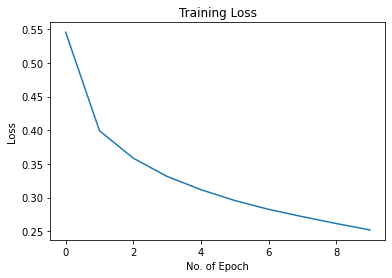

In [ ]:
plt.plot(range(epochs), train_loss)
plt.xlabel("No. of Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

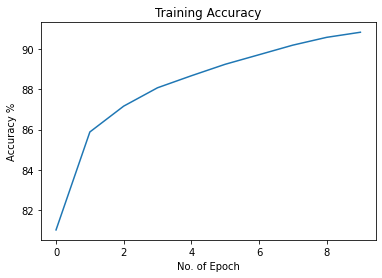

In [ ]:
plt.plot(range(epochs), train_accs)

plt.xlabel("No. of Epoch")
plt.ylabel("Accuracy %")
plt.title("Training Accuracy")
plt.show()

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [ ]:
model.eval_classifier(test_loader, device)

100%|██████████| 10000/10000 [00:02<00:00, 4096.69it/s]


Trained model Accuracy on testset: 87.63%


### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
predictions = model.predict(test_loader, device)

100%|██████████| 10000/10000 [00:01<00:00, 5052.91it/s]


Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
test_images = dataset_test.get_images()
test_labels = dataset_test.get_labels()

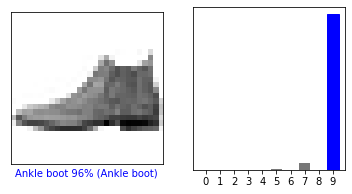

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

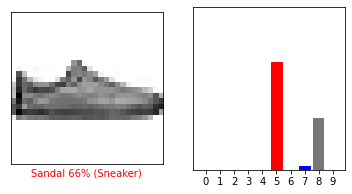

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

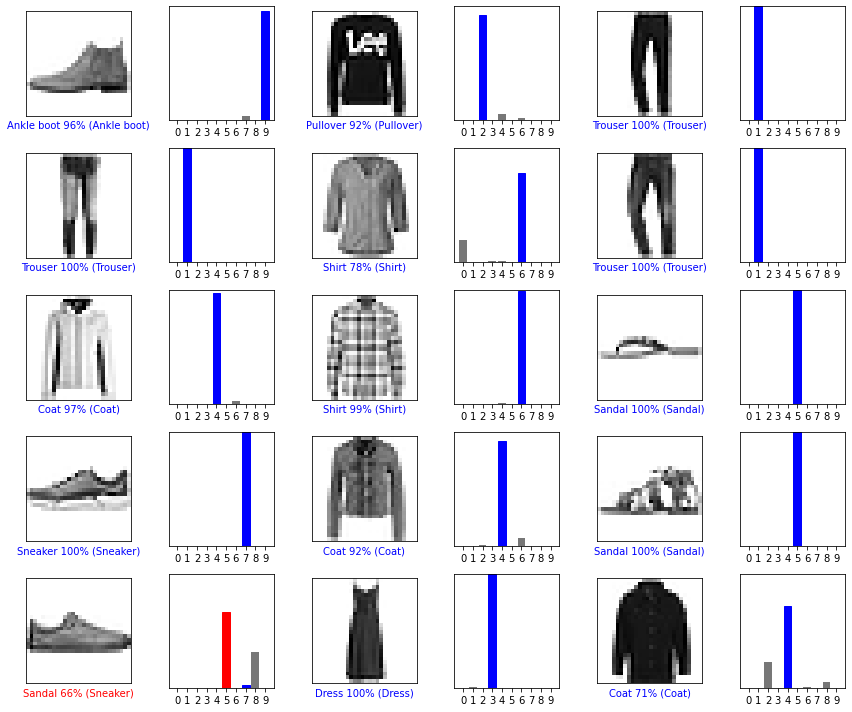

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()